In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()

    return dataset, training_dataset

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Multi - TS LENGTH
dataset_name = 'Idaweb Swiss Temperature Multi TS8'
ts_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [10]:
# TS LENGTH - RPCA
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
r_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# TS LENGTH - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)    

In [12]:
# TS LENGTH - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)    

In [13]:
# TS LENGTH - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# TS LENGTH - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.092, 0.56 , 0.263],
       [0.082, 0.445, 0.183],
       [0.053, 0.537, 0.13 ],
       [0.051, 0.475, 0.112],
       [0.132, 0.28 , 0.247],
       [0.579, 0.018, 0.718],
       [0.559, 0.019, 0.698],
       [0.664, 0.016, 0.8  ],
       [0.586, 0.023, 0.734],
       [0.59 , 0.021, 0.734]])}, {'title': 'Histogram', 'scores': array([[0.048, 0.26 , 0.   ],
       [0.032, 0.245, 0.   ],
       [0.025, 0.217, 0.   ],
       [0.021, 0.218, 0.   ],
       [0.025, 0.196, 0.   ],
       [0.02 , 0.16 , 0.   ],
       [0.008, 0.164, 0.017],
       [0.009, 0.201, 0.024],
       [0.027, 0.104, 0.19 ],
       [0.025, 0.101, 0.179]])}, {'title': 'Cluster', 'scores': array([[0.247, 0.24 , 0.455],
       [0.207, 0.185, 0.351],
       [0.485, 0.043, 0.649],
       [0.463, 0.038, 0.615],
       [0.68 , 0.02 , 0.821],
       [0.366, 0.028, 0.485],
       [0.369, 0.027, 0.486],
       [0.533, 0.024, 0.678],
       [0.431, 0.033, 0.571],
       [0.434, 0.03 , 0.571]])}

In [3]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.092, 0.56 , 0.263],
       [0.082, 0.445, 0.183],
       [0.053, 0.537, 0.13 ],
       [0.051, 0.475, 0.112],
       [0.132, 0.28 , 0.247],
       [0.579, 0.018, 0.718],
       [0.559, 0.019, 0.698],
       [0.664, 0.016, 0.8  ],
       [0.586, 0.023, 0.734],
       [0.59 , 0.021, 0.734]])}, {'title': 'Histogram', 'scores': np.array([[0.048, 0.26 , 0.   ],
       [0.032, 0.245, 0.   ],
       [0.025, 0.217, 0.   ],
       [0.021, 0.218, 0.   ],
       [0.025, 0.196, 0.   ],
       [0.02 , 0.16 , 0.   ],
       [0.008, 0.164, 0.017],
       [0.009, 0.201, 0.024],
       [0.027, 0.104, 0.19 ],
       [0.025, 0.101, 0.179]])}, {'title': 'Cluster', 'scores': np.array([[0.247, 0.24 , 0.455],
       [0.207, 0.185, 0.351],
       [0.485, 0.043, 0.649],
       [0.463, 0.038, 0.615],
       [0.68 , 0.02 , 0.821],
       [0.366, 0.028, 0.485],
       [0.369, 0.027, 0.486],
       [0.533, 0.024, 0.678],
       [0.431, 0.033, 0.571],
       [0.434, 0.03 , 0.571]])}, {'title': 'SVM', 'scores': np.array([[0.407, 0.12 , 0.625],
       [0.343, 0.095, 0.513],
       [0.325, 0.067, 0.524],
       [0.262, 0.072, 0.431],
       [0.847, 0.006, 0.93 ],
       [0.057, 0.04 , 0.077],
       [0.099, 0.037, 0.133],
       [0.374, 0.032, 0.5  ],
       [0.193, 0.064, 0.453],
       [0.184, 0.062, 0.436]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.388, 0.13 , 0.606],
       [0.189, 0.205, 0.328],
       [0.144, 0.177, 0.293],
       [0.061, 0.305, 0.153],
       [0.297, 0.094, 0.484],
       [0.342, 0.072, 0.527],
       [0.253, 0.089, 0.446],
       [0.2  , 0.146, 0.381],
       [0.028, 0.118, 0.197],
       [0.024, 0.119, 0.179]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

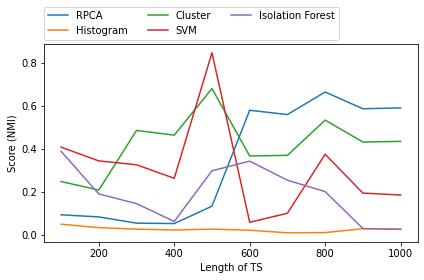

In [7]:
generate_nmi_line_chart(ts_lengths, scores)

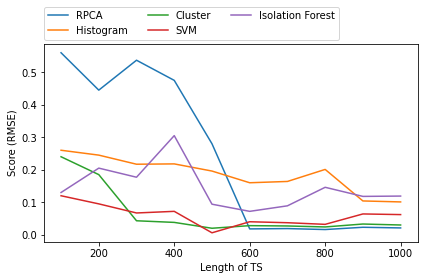

In [8]:
generate_rmse_line_chart(ts_lengths, scores)

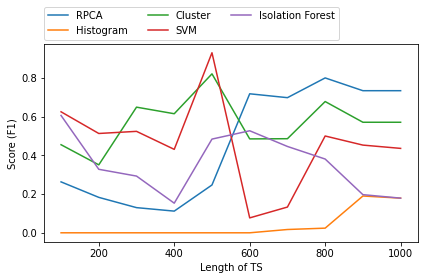

In [9]:
generate_f1_line_chart(ts_lengths, scores)

In [2]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [5]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

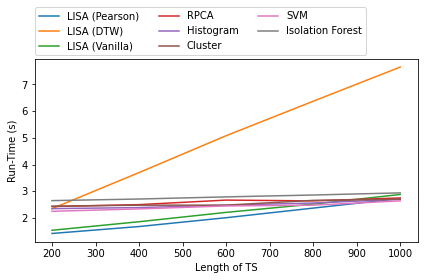

In [6]:
#PLOT
generate_timeit_line_chart(dimension, scores)
